In [1]:
import numpy as np
from scipy.linalg import lu
import SolveTriangular
from scipy.linalg import qr
import matplotlib.pyplot as plt

## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

In [21]:
def gauss(A, b):
    PT, L, U = lu(A)
    P = PT.T
    
    y, flag = SolveTriangular.Lsolve(L,P@b)
    x, flag = SolveTriangular.Usolve(U,y)
    
    return x

def my_inv(A, ident):
    inv = []
    
    for i in range(A.shape[1]):
        elem_new = gauss(A1, ident[:,i])
        if i == 0:
            inv = elem_new
        else:
            inv = np.concatenate((inv,elem_new),axis=1)
    
    return inv

A1 = np.array([ [4.5,1,3,2], [1,-8,2,1], [-1,-2,-3,-1], [2,6,0,1] ])
#b_prova = np.sum(A1,axis=1).reshape(A1.shape[0],1)
#print(gauss(A1,b_prova))
I = np.eye(A1.shape[0])
print("Inversa con funziona esistente \n", np.linalg.inv(A1))
print("Inversa fatta con la mia funzione \n", my_inv(A1, I))

det = np.prod(np.linalg.eigvals(A1))
print(det)
print(np.linalg.det(A1))
# per calcolare il determinante con la fattorizzazione di gauss

def my_det(A):
    PT, L, U = lu(A)
    
    return np.linalg.det(L) * np.linalg.det(U)

print("determinante calcolato con il mio metodo", my_det(A1))

Inversa con funziona esistente 
 [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]
Inversa fatta con la mia funzione 
 [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]
58.00000000000017
57.999999999999986
determinante calcolato con il mio metodo 57.999999999999986


## Esercizio  B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$

**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 y+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

In [16]:
x1 = np.array([0,4,0,5])
y1 = np.array([0,0,4,6])

Scrivere lo script Python  in cui
- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 2**]

In [3]:
# a3 può essere scritto come a3 = -x^2 -y^2 -a1x -a2y
# coppie (0,0) a1,a2,a3 = 0
# coppie (4,0) a2 = 0, a3 = -16 -4a1
# coppie (0,4) a1 = 0, a3 = -16 -4a2
# coppie (5,6) a3 = -61 -5a1 -6a2

A = np.ones((len(x), 3)) # il secondo paramentro sono il num di colonne che vuoi
A[:,1] = y
A[:,2] = x
b = -(x**2 + y**2)
print(A)
print(b)

[[1. 0. 0.]
 [1. 0. 4.]
 [1. 4. 0.]
 [1. 6. 5.]]
[  0 -16 -16 -61]


- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$;   [**punti 5**]

In [19]:
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[:n,:n],h[:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

sol,res = qrLS(A,b)
sol = np.flip(sol)
print(sol)

[[-5.61904762]
 [-5.75396825]
 [ 3.77777778]]


-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]

(-1.0626915068713172,
 6.681873916879319,
 -0.9953356522278847,
 6.749303906196137)

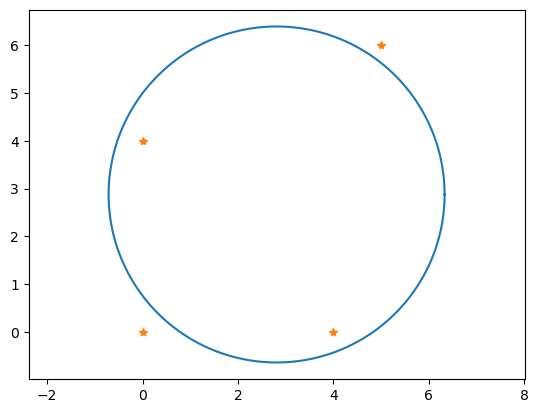

In [21]:
C = np.array([-sol[0]/2, -sol[1]/2])
r = np.sqrt( (sol[0]**2/4)+(sol[1]**2/4)-sol[2] )

x = lambda t : C[0] + r*np.cos(t)
y = lambda t : C[1] + r*np.sin(t)
all_t = np.linspace(0,2*np.pi,360)

plt.plot(x(all_t),y(all_t),x1,y1,'*')
plt.axis('equal')

## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]